# Sales Analysis

This is a personal project where I will anaylze some sales data for the year 2019. This is a showcase of my skills as a data analyst. I will be coding in Python to show how I using Pandas and Matplotlib to perfrom exploratory data anaylsis.


## Task 1: Loading the data

First lets import the necesary packages and then input the data using Pandas read_csv()

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
desired_width= 400
pd.set_option('display.width',desired_width)
pd.set_option('display.max_columns', 20)


jan = pd.read_csv("Sales_January_2019.csv")
feb =pd.read_csv("Sales_February_2019.csv")
mar =pd.read_csv("Sales_March_2019.csv")
apr = pd.read_csv("Sales_April_2019.csv")
may = pd.read_csv("Sales_May_2019.csv")
jun = pd.read_csv("Sales_June_2019.csv")
jul =pd.read_csv("Sales_July_2019.csv") 
aug = pd.read_csv("Sales_August_2019.csv")
sept= pd.read_csv("Sales_September_2019.csv")
oct =pd.read_csv("Sales_October_2019.csv")
nov = pd.read_csv("Sales_November_2019.csv")
dec =pd.read_csv("Sales_December_2019.csv")


All months data is loaded. Let's take a look at the columns we are working with:

In [51]:
jan.describe()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,19,8077,9161
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,16,1171,8795,1171,16,16


In [52]:
feb.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,12004,12004,12004,12004,12004,12004
unique,11508,20,8,19,9627,11316
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,18,1514,10863,1514,18,18


In [53]:
mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15226 entries, 0 to 15225
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          15189 non-null  object
 1   Product           15189 non-null  object
 2   Quantity Ordered  15189 non-null  object
 3   Price Each        15189 non-null  object
 4   Order Date        15189 non-null  object
 5   Purchase Address  15189 non-null  object
dtypes: object(6)
memory usage: 713.8+ KB


Interesting. Looks like everything is loaded as an "Object", so a string. We will have to change that to do some calculations. Lets just make sure

In [54]:
list(apr.columns)


['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

Let's make this a little easier and make a for loop to write out column names


In [55]:
months = [jan, feb, mar, apr, may, jun, jul,aug, sept, oct, nov , dec]

for mon in months:
    print(list(mon.columns))

['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchas

Great! Easy to see they all have the same column names. Nice and easy to merge. Lets check the dimensions of Janurary to start, so we can know if they have merged.

In [56]:
jan.shape



(9723, 6)

So there is 6 columns and over 9 thousand rows. Now when we merge them we can checke the shape of the data frame to see if we merged them successfully.

In [57]:
data= pd.DataFrame()
for mon in months:
    data = pd.concat([data,mon])


data.shape

(186850, 6)

Great, looks like we merged all the data, still having the same number of columns. Lets look at what this new data frame looks like.

In [58]:
data.head

<bound method NDFrame.head of       Order ID                     Product Quantity Ordered Price Each      Order Date                        Purchase Address
0       141234                      iPhone                1        700  01/22/19 21:25         944 Walnut St, Boston, MA 02215
1       141235    Lightning Charging Cable                1      14.95  01/28/19 14:15        185 Maple St, Portland, OR 97035
2       141236            Wired Headphones                2      11.99  01/17/19 13:33   538 Adams St, San Francisco, CA 94016
3       141237            27in FHD Monitor                1     149.99  01/05/19 20:33      738 10th St, Los Angeles, CA 90001
4       141238            Wired Headphones                1      11.99  01/25/19 11:59           387 10th St, Austin, TX 73301
...        ...                         ...              ...        ...             ...                                     ...
25112   319666    Lightning Charging Cable                1      14.95  12/11/19 

## ASK
OK great. We need to consider some business problems. Perhaps the following would be great things to explore:
1. What is the best month for sales?
2. What is the best location for sales?
3. What is the best times(of the day) for sales?
4. What are the best selling items? Both number sold and in USD.
5. What are the most common items purchased together?

All of this will help guide us through the manipulation of this data. Note: We still haven't changed any of the types. They are still all objects, we need to change some to floats and integers.
## Task 2. Analyze and clean the data
### What is the best month for sales?
Let's start by making a new column name "sale", which will be the total of the sale. We will need to change both 'Quantity Ordered' and 'Price Each' to int and float repspectivley. 


In [59]:
# data['Quantity Ordered'] = data['Quantity Ordered'].astype('int32')

Looks like we cannot conver float of NaN to an integer. Which means we have some nulls we need to clean out.

In [60]:
temp = data[data['Quantity Ordered'].isna()]

temp.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN


Looks like there are some whole rows that are full of nulls. Lets filter our those rows.

In [61]:
data = data[-(data['Quantity Ordered'].isna())]

data.shape

(186305, 6)

Looks like there was about 500 rows that we cleaned out of all these null values. Now lets try converting that column to a int again. 

In [62]:
#data['Quantity Ordered'] = data['Quantity Ordered'].astype('int32')

Interesting. Looks like we have some values that are not able to convert. Lets the the value counts for this column

In [63]:
quantities = data["Quantity Ordered"].value_counts()
quantities

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

There it is. Looks like aside from numbers in this output, there is a common one called "Quanitity Ordered". Lets clear that out too. 

In [64]:
data = data[-(data["Quantity Ordered"]=="Quantity Ordered")]

quantities2= data["Quantity Ordered"].value_counts()

quantities2


1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

In [65]:
data['Quantity Ordered'] = data['Quantity Ordered'].astype('int32')

data['Quantity Ordered'].dtype

dtype('int32')

Great! Finally converted to integer. Now lets change the 'Price Each' column to a float. 

In [66]:
data["Price Each"]= data["Price Each"].astype("float64")

print(data['Price Each'].dtype)


float64


Great. All changed to float. Now we can fnially make our "Sale" column by multiplying to two numbers.

In [67]:
data["Sale"] = data['Quantity Ordered']*data["Price Each"]

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99


Now we need to make a column from the "Order Date" to make a "Month" column. To do this we will use the split function to split the string and extract the month.

In [68]:
data["Month"] = data["Order Date"].apply(lambda x: x.split('/')[0])

data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00,01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95,01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98,01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99,01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99,01


Quick lets just check to see there are different months in this  and not just Janurary.

In [69]:
print(data["Month"].value_counts())

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Name: Month, dtype: int64


Great lets change into an int.

In [70]:
data["Month"] = data.Month.astype('int32')

print(data.Month.dtype)

data.head()

int32


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00,1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95,1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98,1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99,1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99,1


Now that we have a month column we can filter through months and sum the sales.

In [71]:

month_sales= data.groupby("Month").sum()

month_sales

,Quantity Ordered,Price Each,Sale
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


Great. Now lets visualize this with MatPlotlib.

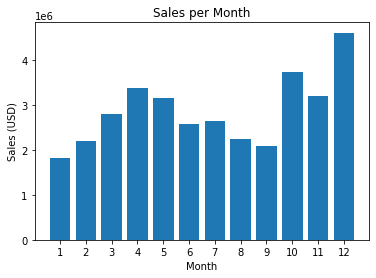

In [72]:
mon_range= range(1,13)
plt.bar(month_sales.index,month_sales["Sale"])
plt.xlabel("Month")
plt.ylabel("Sales (USD)")
plt.xticks(month_sales.index)
plt.title("Sales per Month")
plt.show()


It's clear December is the best month for Sales with Janurary being the worst. 
### What is the best location for sales?
 Now let's try and find the best and worst location for sales. Here we will need to extract a city column from the "Purchase Address" column. Looks like it is between to Commas. An easy function can be made for this by splitting the string by comma and selecting the 1st index.

In [73]:
def find_city(address):
    return address.split(',')[1]


data["City"] = data["Purchase Address"].apply(lambda x: find_city(x))

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00,1,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95,1,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98,1,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99,1,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99,1,Austin


Now, city seemed strange as there technically could be Cities with the same name. For this lets make a function to add the state in brackets behind the city name.

In [74]:
def add_state(address): 
    return address.split(',')[2].split(' ')[1]

data["City"] = data["Purchase Address"].apply(lambda x: find_city(x) + " (" + add_state(x) + ")")

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00,1,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95,1,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98,1,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99,1,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99,1,Austin (TX)


Very nice let's now group by city and find the sum

In [75]:

city_sales= data.groupby("City").sum()

city_sales

,Quantity Ordered,Price Each,Sale,Month
City,,,,
Atlanta (GA),16602,2.779908e+06,2.795499e+06,104794
Austin (TX),11153,1.809874e+06,1.819582e+06,69829
Boston (MA),22528,3.637410e+06,3.661642e+06,141112
Dallas (TX),16730,2.752628e+06,2.767975e+06,104620
Los Angeles (CA),33289,5.421435e+06,5.452571e+06,208325
New York City (NY),27932,4.635371e+06,4.664317e+06,175741
Portland (ME),2750,4.471893e+05,4.497583e+05,17144
Portland (OR),11303,1.860558e+06,1.870732e+06,70621
San Francisco (CA),50239,8.211462e+06,8.262204e+06,315520


Looks like this busniess has 10 different places to order from. Lets graph to see sales.

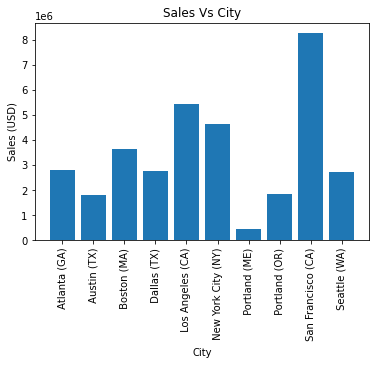

In [76]:
plt.bar(city_sales.index, city_sales["Sale"])
plt.title("Sales Vs City")
plt.xticks(rotation="vertical")
plt.ylabel("Sales (USD)")
plt.xlabel("City")
plt.show()

Looks like San Franciso has the highest annual sales while Portland (ME) is the lowest.

### What is the best times(of the day) for sales? 
Here we will need to extract times from the "Order Date" column. This will be interesting since it is currently a string.


In [77]:
data["Order Date"]= pd.to_datetime(data["Order Date"])

data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1,Austin (TX)


Great! Looks like the column is now in the datetime format. Now lets analyze how this works in respect to most frequent time for purchasing by hour.

In [78]:
data["Hour"] = data["Order Date"].dt.hour
data["Time"] = data["Order Date"].dt.time

data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,City,Hour,Time
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1,Boston (MA),21,21:25:00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1,Portland (OR),14,14:15:00
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1,San Francisco (CA),13,13:33:00
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1,Los Angeles (CA),20,20:33:00
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1,Austin (TX),11,11:59:00


Looks like it is in 24 time so there is no need to care for overlap, or to differ between AM and PM.

In [79]:
purchase_hour = data.groupby("Hour").count()


purchase_hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,City,Time
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


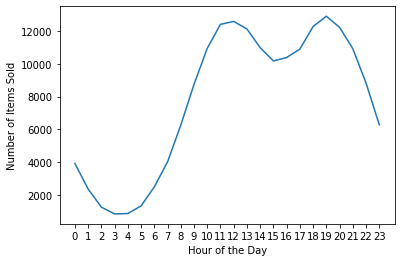

In [80]:
plt.plot(purchase_hour.index, purchase_hour["Quantity Ordered"])
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Items Sold")
plt.xticks(purchase_hour.index)
plt.show()

Intersting. I wonder if this varies based on city. 

In [81]:
import seaborn as sns 

purchase_hour_city = data.groupby(["Hour", "City"]).count()

purchase_hour_city

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address  Sale  Month  Time
Hour City                                                                                                                 
0     Atlanta (GA)             310      310               310         310         310               310   310    310   310
      Austin (TX)              198      198               198         198         198               198   198    198   198
      Boston (MA)              426      426               426         426         426               426   426    426   426
      Dallas (TX)              285      285               285         285         285               285   285    285   285
      Los Angeles (CA)         637      637               637         637         637               637   637    637   637
...                            ...      ...               ...         ...         ...               ...   ...    ...   ...
23    New York City (NY)       814      814               814         814         814               814   814    814   814
      Portland (ME)             64       64                64          64          64                64    64     64    64
      Portland (OR)            323      323               323         323         323               323   323    323   323
      San Francisco (CA)      1462     1462              1462        1462        1462              1462  1462   1462  1462
      Seattle (WA)             551      551               551         551         551               551   551    551   551

[240 rows x 9 columns]

In [82]:
data["Hour"] = data["Hour"].astype("int32")

data['Hour'].dtype

data["City"] = data["City"].astype("category")

data['City'].dtype


CategoricalDtype(categories=[' Atlanta (GA)', ' Austin (TX)', ' Boston (MA)', ' Dallas (TX)', ' Los Angeles (CA)', ' New York City (NY)', ' Portland (ME)', ' Portland (OR)', ' San Francisco (CA)', ' Seattle (WA)'], ordered=False)

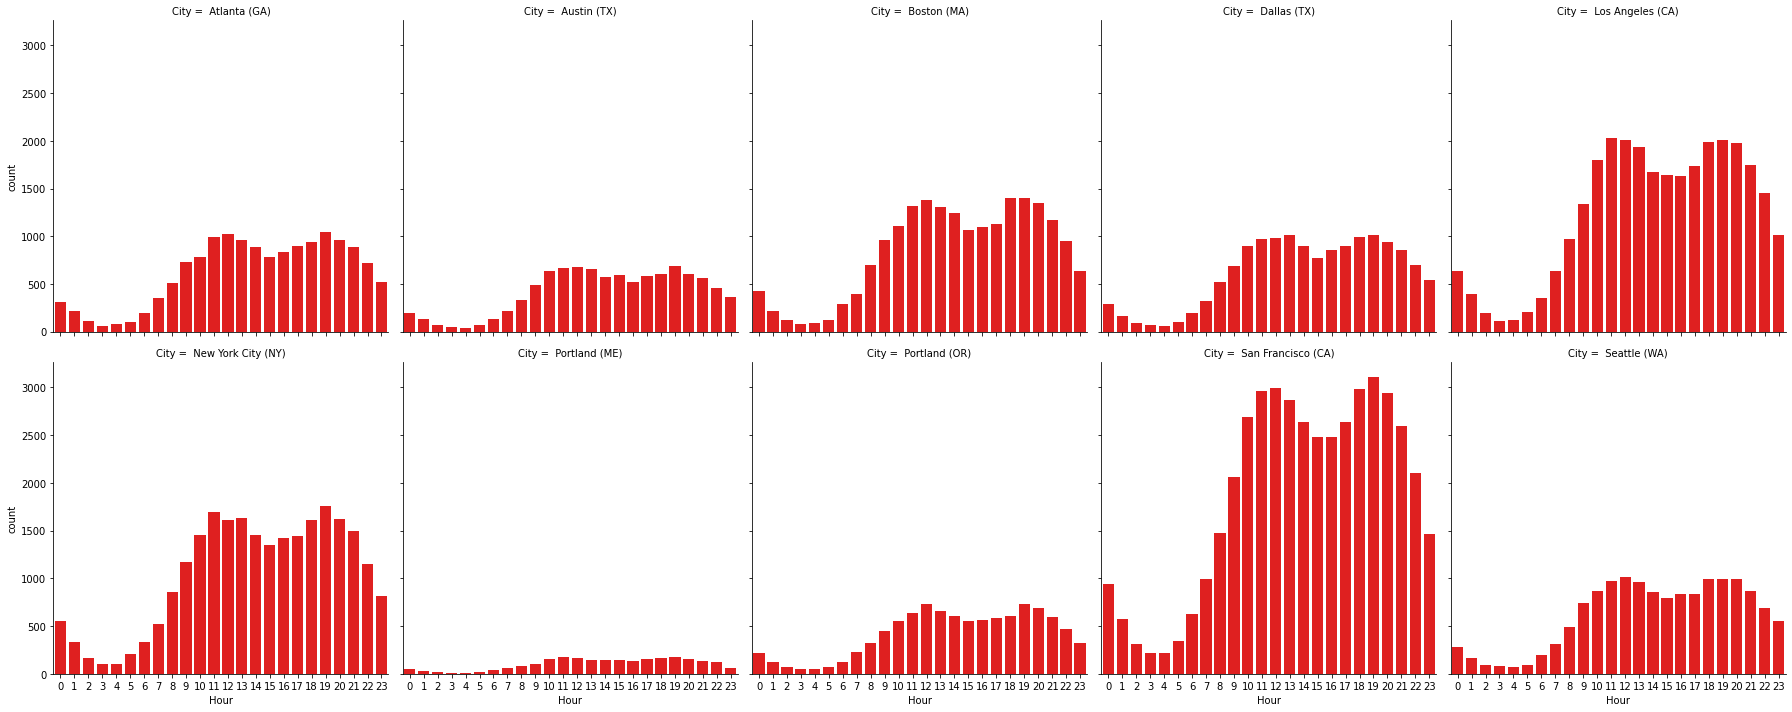

In [83]:
sns.catplot(x="Hour", data=data,kind="count", col= "City", col_wrap=5, color="red")


Looks like in general there is a spike around 10-12 and then again around 6 pm for most branches. Might be a good idea to have advertisments close to those times to maximize sales.

### 4. What are the best selling items? Both number sold and in USD.

For this we dont need to visualize but a simple chart will suffice.


In [84]:
hot_items = data.groupby("Product").sum()

hot_items_quantity = hot_items.sort_values(by="Quantity Ordered", ascending=False)
cold_items_quantity = hot_items.sort_values(by="Quantity Ordered")

hot_items_quantity.head()

,Quantity Ordered,Price Each,Sale,Month,Hour
Product,,,,,
AAA Batteries (4-pack),31017,61716.59,92740.83,146370,297332
AA Batteries (4-pack),27635,79015.68,106118.40,145558,298342
USB-C Charging Cable,23975,261740.85,286501.25,154819,314645
Lightning Charging Cable,23217,323787.10,347094.15,153092,312529
Wired Headphones,20557,226395.18,246478.43,133397,271720


The five most popular items.

In [85]:
cold_items_quantity.head()

,Quantity Ordered,Price Each,Sale,Month,Hour
Product,,,,,
LG Dryer,646,387600.00,387600.00,4383,9326
LG Washing Machine,666,399600.00,399600.00,4523,9785
Vareebadd Phone,2068,826000.00,827200.00,14309,29472
20in Monitor,4129,451068.99,454148.71,29336,58764
ThinkPad Laptop,4130,4127958.72,4129958.70,28950,59746


The five least purchased items.

In [86]:
hot_items_USD = hot_items.sort_values(by="Sale", ascending=False)
cold_items_USD = hot_items.sort_values(by="Sale")

hot_items_USD.head()



,Quantity Ordered,Price Each,Sale,Month,Hour
Product,,,,,
Macbook Pro Laptop,4728,8030800.00,8037600.00,33548,68261
iPhone,6849,4789400.00,4794300.00,47941,98657
ThinkPad Laptop,4130,4127958.72,4129958.70,28950,59746
Google Phone,5532,3315000.00,3319200.00,38305,79479
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,44440,90916


Macbook Pro sold the most in terms of USD

In [87]:
cold_items_USD


,Quantity Ordered,Price Each,Sale,Month,Hour
Product,,,,,
AAA Batteries (4-pack),31017,61716.59,92740.83,146370,297332
AA Batteries (4-pack),27635,79015.68,106118.40,145558,298342
Wired Headphones,20557,226395.18,246478.43,133397,271720
USB-C Charging Cable,23975,261740.85,286501.25,154819,314645
Lightning Charging Cable,23217,323787.10,347094.15,153092,312529
LG Dryer,646,387600.00,387600.00,4383,9326
LG Washing Machine,666,399600.00,399600.00,4523,9785
20in Monitor,4129,451068.99,454148.71,29336,58764
Vareebadd Phone,2068,826000.00,827200.00,14309,29472


Looks like battries sold the most quantity wise, but least USD wise.

### 5. What are the most common items purchased together?
Now last task, finding the most common items purhcased together. My first intinct is to group by order id and make stringsas a combination of the items with the same order id. Then do a simple value counts to of the combination of strings to see the most popular combinations. 

However, I see a couple problems with this :
1. They may be purchased in different order(like batteries, laptop vs laptop, batteries)
    - this would count the combination as two distict entries. We do not want that
2. The order may have more than two items, but still have to purchased item together. 

Considering these, we should be able to iterate through a list of list to find all possible combinations.

In [88]:
df = data[data["Order ID"].duplicated(keep= False)]

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,City,Hour,Time
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",11.95,1,Austin (TX),16,16:06:00
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",11.99,1,Austin (TX),16,16:06:00
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",150.00,1,Los Angeles (CA),8,08:25:00
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",11.52,1,Los Angeles (CA),8,08:25:00
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",400.00,1,New York City (NY),11,11:19:00


In [89]:
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

df.head()

<ipython-input-89-0df5ace95177>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,City,Hour,Time,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",11.95,1,Austin (TX),16,16:06:00,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",11.99,1,Austin (TX),16,16:06:00,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",150.00,1,Los Angeles (CA),8,08:25:00,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",11.52,1,Los Angeles (CA),8,08:25:00,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",400.00,1,New York City (NY),11,11:19:00,"Vareebadd Phone,Wired Headphones"


Now the only problem with this is there is still duplicate order id's, which means some orders would be counted twice or three times.

In [90]:
df = df.drop_duplicates(subset=["Order ID"], keep="first") 

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,City,Hour,Time,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",11.95,1,Austin (TX),16,16:06:00,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",150.00,1,Los Angeles (CA),8,08:25:00,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",400.00,1,New York City (NY),11,11:19:00,"Vareebadd Phone,Wired Headphones"
153,141384,Google Phone,1,600.00,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",600.00,1,Boston (MA),0,00:14:00,"Google Phone,USB-C Charging Cable"
220,141450,Google Phone,1,600.00,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",600.00,1,San Francisco (CA),11,11:16:00,"Google Phone,Bose SoundSport Headphones"


So now the duplicate ordered are droped, we can then try to use combinatorics to search through the strings to find the most common pair of items purcahsed together.

In [91]:
df1= df[["Order ID", "Grouped"]]

df1.head()

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [96]:
from itertools import combinations
from collections import Counter

count = Counter()


for row in df1["Grouped"]:
     row_list=row.split(",")
     count.update(Counter(combinations(row_list, 2)))
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

Not the best or most organized, but you can find the msot common items purchased together are the Iphone and the Lightning Charging Cable.